# Locked Down California Records Much Larger Increase in Overall Deaths than Open Florida in 2020

Different states employed vastly different strategies to fight against the coronavirus pandemic of 2020. Both California and Florida took measures to prevent the spread of the novel coronavirus, but each took different paths and had different levels of restrictions. California is usually ranked as a state with some of the most restrictions while Florida has been one with some of the least.


This post examines the timeline of preventative measures and overall deaths by age group in each state.

## Timelines of preventative measures

See the full timelines for [California][1] and [Florida][2]. A summary for each state will be provided below.


[1]: https://en.wikipedia.org/wiki/COVID-19_pandemic_in_California#Timeline
[2]: https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Florida#Timeline

###  California timeline

* March 2, 2020 — state of emergency issued
* March 19, 2020— stay at home order issued
* April 1, 2020 — schools closed
* May 7, 2020 — beginning of reopening (did not get very far)
* June 18, 2020 — universal masking guidance
* July 18, 2020 — Re-closure of most businesses (gyms, bars, theaters)
* August 28, 2020 — Created Blueprint for Safer Economy (BSE)— specific metrics (cases per thousand, percent positive, etc…) that had to be met for reopening/closing
* November 21, 2020 — Nighttime curfew
* April 6, 2021 — Majority of the population under moderate BSE — businesses open with capacity limits
* June 15, 2021 — Scheduled full reopening

### Florida timeline

* March 17, 2020 — bars and nightclubs closed
* April 1, 2020 — stay at home order issued
* April 17, 2020 — some beaches allowed to reopen safely
* May — July, 2020 — some counties issue mask mandates
* June 1, 2020 — Governor DeSantis extended the statewide moratorium on evictions and foreclosures another 30 day
* September 10, 2020 — DeSantis rescinded the executive order prohibiting alcohol sales at bars
* September 25, 2020 — DeSantis begins to take action against preventative measures — prohibits local governments from imposing fines or shutting down businesses for violations of mask mandates
* April 2, 2021 — DeSantis signed an executive order prohibiting vaccine passports

## Comparing deaths between states

From what I’ve gathered, the conventional wisdom is that the more preventative measures taken, the less deaths from COVID-19 (and less overall deaths) will take place. As California had implemented more preventative measures and for a longer time frame, we would expect less deaths.

### Code

Below is the code to total the deaths by year and state. The source is from the [Weekly Counts of Deaths by Jurisdiction][1] dataset from the CDC.

[1]: https://data.cdc.gov/NCHS/Weekly-Counts-of-Deaths-by-Jurisdiction-and-Age/y5bj-9g5w

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sodapy import Socrata
from pathlib import Path
from IPython.display import display_html

plt.style.use('dashboard.mplstyle')
pd.options.display.max_columns = 300
pd.options.display.max_rows = 200
pd.options.display.max_colwidth = 400

* You'll need a Socrata account - https://dev.socrata.com/foundry/data.cdc.gov/y5bj-9g5w
* Also download sodapy library `pip install sodapy`

In [2]:
# functions to get data from Socrata (You'll need to create an account)
# put app token in this file in home directory `~/.socrata/app_token`

def get_socrata(code):
    p = Path.home() / '.socrata'
    app_token = open(p / 'app_token').read()[:-1]
    client = Socrata("data.cdc.gov", app_token)
    results = client.get(code, limit=500_000)
    return pd.DataFrame.from_records(results)

def create_pivot(df, cause):
    return df.pivot(index='year', columns='month', values=cause)

In [3]:
df = get_socrata("y5bj-9g5w")
df['age_group'] = df['age_group'].replace({'85 years and older': '85+', 'Under 25 years': '0-24'}).str[:5]
df['jurisdiction'] = df['jurisdiction'].replace({'New York City': 'New York'})
df['week_ending_date'] = df['week_ending_date'].astype('datetime64[ns]')
df['year'] = df['year'].astype('int64')
df['week'] = df['week'].astype('int64')
df['number_of_deaths'] = df['number_of_deaths'].astype('float64')
df = df.groupby(['jurisdiction', 'week_ending_date', 'year', 
            'week', 'age_group', 'type'])['number_of_deaths'].sum().reset_index()

df_weight = df.query('type == "Predicted (weighted)"').pivot(index='week_ending_date', 
                                       columns=['jurisdiction', 'age_group'], 
                                       values='number_of_deaths').fillna(0).astype("int64")

start, end = df_weight.index[[0, -1]]
idx = pd.date_range(start, end)
df_weight = df_weight.reindex(idx, method='bfill') / 7
idx = pd.date_range('1/1/2015', end)
df_weight = df_weight.reindex(idx, method='bfill')
df_weight.head()

jurisdiction   Alabama                                                        \
age_group         0-24     25-44      45-64      65-74      75-84        85+   
2015-01-01    3.571429  9.571429  36.142857  28.857143  38.857143  45.714286   
2015-01-02    3.571429  9.571429  36.142857  28.857143  38.857143  45.714286   
2015-01-03    3.571429  9.571429  36.142857  28.857143  38.857143  45.714286   
2015-01-04    3.571429  9.571429  36.142857  28.857143  38.857143  45.714286   
2015-01-05    3.571429  9.571429  36.142857  28.857143  38.857143  45.714286   

jurisdiction    Alaska                                          Arizona        \
age_group        45-64     65-74     75-84       85+ 25-44 0-24    0-24 25-44   
2015-01-01    3.142857  1.714286  1.857143  2.142857   0.0  0.0     4.0   7.0   
2015-01-02    3.142857  1.714286  1.857143  2.142857   0.0  0.0     4.0   7.0   
2015-01-03    3.142857  1.714286  1.857143  2.142857   0.0  0.0     4.0   7.0   
2015-01-04    3.142857  1.714286  1.857143  2.142857   0.0  0.0     4.0   7.0   
2015-01-05    3.142857  1.714286  1.857143  2.142857   0.0  0.0     4.0   7.0   

jurisdiction                                         Arkansas            \
age_group         45-64 65-74      75-84        85+      0-24     25-44   
2015-01-01    29.428571  28.0  41.714286  52.857143  2.142857  3.428571   
2015-01-02    29.428571  28.0  41.714286  52.857143  2.142857  3.428571   
2015-01-03    29.428571  28.0  41.714286  52.857143  2.142857  3.428571   
2015-01-04    29.428571  28.0  41.714286  52.857143  2.142857  3.428571   
2015-01-05    29.428571  28.0  41.714286  52.857143  2.142857  3.428571   

jurisdiction                                             California        \
age_group         45-64      65-74      75-84        85+       0-24 25-44   
2015-01-01    19.714286  23.142857  27.714286  30.428571  15.571429  36.0   
2015-01-02    19.714286  23.142857  27.714286  30.428571  15.571429  36.0   
2015-01-03    19.714286  23.142857  27.714286  30.428571  15.571429  36.0   
2015-01-04    19.714286  23.142857  27.714286  30.428571  15.571429  36.0   
2015-01-05    19.714286  23.142857  27.714286  30.428571  15.571429  36.0   

jurisdiction                                        Colorado                  \
age_group          45-64       65-74  75-84    85+      0-24     25-44 45-64   
2015-01-01    152.285714  138.285714  183.0  305.0  2.285714  5.142857  23.0   
2015-01-02    152.285714  138.285714  183.0  305.0  2.285714  5.142857  23.0   
2015-01-03    152.285714  138.285714  183.0  305.0  2.285714  5.142857  23.0   
2015-01-04    152.285714  138.285714  183.0  305.0  2.285714  5.142857  23.0   
2015-01-05    152.285714  138.285714  183.0  305.0  2.285714  5.142857  23.0   

jurisdiction                                  Connecticut             \
age_group         65-74      75-84        85+       25-44      45-64   
2015-01-01    19.714286  30.428571  45.857143    2.857143  14.142857   
2015-01-02    19.714286  30.428571  45.857143    2.857143  14.142857   
2015-01-03    19.714286  30.428571  45.857143    2.857143  14.142857   
2015-01-04    19.714286  30.428571  45.857143    2.857143  14.142857   
2015-01-05    19.714286  30.428571  45.857143    2.857143  14.142857   

jurisdiction                                   Delaware                      \
age_group         65-74 75-84        85+ 0-24     45-64     65-74     75-84   
2015-01-01    15.571429  20.0  39.285714  0.0  5.714286  4.857143  8.571429   
2015-01-02    15.571429  20.0  39.285714  0.0  5.714286  4.857143  8.571429   
2015-01-03    15.571429  20.0  39.285714  0.0  5.714286  4.857143  8.571429   
2015-01-04    15.571429  20.0  39.285714  0.0  5.714286  4.857143  8.571429   
2015-01-05    15.571429  20.0  39.285714  0.0  5.714286  4.857143  8.571429   

jurisdiction                  District of Columbia                           \
age_group      85+ 25-44 0-24                45-64     65-74     75-84  85+   
2015-01-01    13.0   0.0  0

Total deaths

In [4]:
df_year = df_weight.resample('Y').sum()
df_17_19 = df_year.loc['2017':'2019'].mean().unstack().round(0)
df_20 = df_year.loc['2020'].squeeze().unstack().round(0)

states = ['California', 'Florida']
df_compare = pd.concat((df_17_19.loc[states], df_20.loc[states]), 
                       keys=['2017-19 Avg', '2020']).astype('int')
df_compare = df_compare.rename_axis(index=['Year', 'State'], columns=None).sort_values('State')
df_compare = df_compare.applymap(lambda x: f'{x:,.0f}').reset_index()
df_compare

,Year,State,0-24,25-44,45-64,65-74,75-84,85+
0,2017-19 Avg,California,"5,803","13,019","50,026","48,930","61,677","90,617"
1,2020,California,"6,382","17,914","60,443","60,658","73,608","101,878"
2,2017-19 Avg,Florida,"3,927","9,791","37,824","39,517","51,119","65,817"
3,2020,Florida,"4,105","12,227","42,820","47,107","61,601","75,133"


### Percent increase

In [5]:
perc_inc = ((df_20.loc[states] / df_17_19.loc[states]).T - 1) * 100
perc_inc

jurisdiction,California,Florida
age_group,,
0-24,9.977598,4.532722
25-44,37.598894,24.879992
45-64,20.823172,13.208545
65-74,23.968935,19.206924
75-84,19.344326,20.505096
85+,12.427028,14.154398


Create visualization

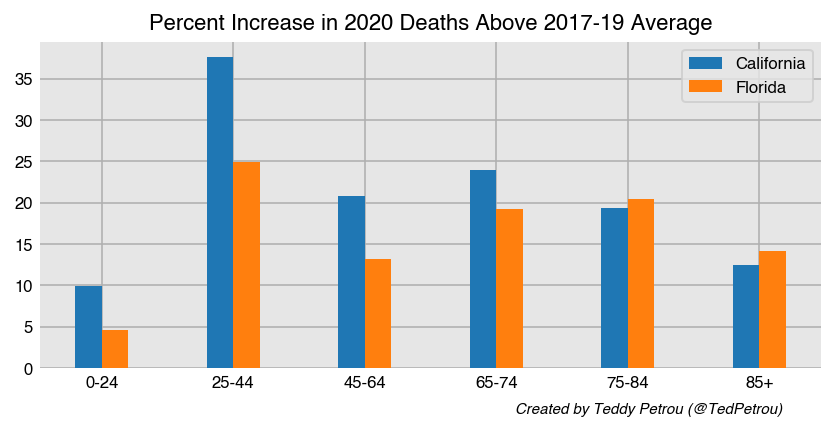

Year,State,0-24,25-44,45-64,65-74,75-84,85+
2017-19 Avg,California,"5,803","13,019","50,026","48,930","61,677","90,617"
2020,California,"6,382","17,914","60,443","60,658","73,608","101,878"
2017-19 Avg,Florida,"3,927","9,791","37,824","39,517","51,119","65,817"
2020,Florida,"4,105","12,227","42,820","47,107","61,601","75,133"


In [6]:
fig = plt.Figure(figsize=(7, 3))
ax = fig.add_subplot()
n = len(perc_inc)
ax.bar(np.arange(n), height=perc_inc['California'], 
       width=-0.2, align='edge', tick_label=perc_inc.index, label='California')
ax.bar(np.arange(n), height=perc_inc['Florida'], 
       width=0.2, align='edge', label='Florida')
ax.legend()
ax.set_title('Percent Increase in 2020 Deaths Above 2017-19 Average', size=11)
ax.text(.95, -0.14, "Created by Teddy Petrou (@TedPetrou)", transform=ax.transAxes, 
        size=7.5, style='italic', ha='right');

# style DataFrame
styled = df_compare.style.set_table_styles([{'props': [('font-size', '16px')]}]).hide_index()
html = '<div style="display:flex; justify-content:center; margin-top: -30px; margin-right: 150px">{df}</div>'
final_html = html.format(df=styled._repr_html_())
display(fig)
display_html(final_html, raw=True)

### California records substantially more deaths in the youth and slightly less in the elderly

While preventative measures may have an impact of the spread of coronavirus, they clearly have an impact on people. Schools, restaurants, sporting events, gyms, etc… shutting down impacts the lives of these people, often in a negative and harmful way.

To capture the overall burden of COVID-19 and these preventative measures, I compared the total number of deaths by age in 2020 versus the 2017–19 average.

Both states recorded increases in all age categories, but California performed much worse with the youth and just slightly better in the two oldest age groups. The 25–44 year old age group suffered the largest increase in both states, but was 12% higher in California.

It’s likely that younger people are more affected by preventative measures than the elderly. An average 85 year old has more than 1,000 times higher chance of dying of COVID-19 than an average 15 year old.
While it’s not certain why California performed so much worse with the youth than Florida, it seems unlikely that these measures did anything positive for them. And it could very well be that these preventative measures where the direct cause of more youth death, particularly as overdoses and car accident deaths soared in 2020.
Years of life lost

While protecting the old and vulnerable is a valuable ambition, it must be balanced with the cost on the young and healthy. An average 30 year old might have 60 years of life remaining, while an average 90 year old has less than 5. For every extra 30 year old that dies, at least 12 deaths from 90 year olds must be prevented in order to have an have an equal number of years of life lost.

### Worse case scenario

Compared to Florida, it appears that California took a path that ended up being the worse case. It had much more restrictions (which affects everyone), much higher youth death, and approximately the same elderly death.
What do you think?

I’m interested to know what you think about preventative measures, particularly school and business closures. Let me know in the comments below whether you think. Should lockdowns and business closures be done when the youth have 1000x less risk of death than the elderly?